### 1. Use pandas to create a Series from the following data:

In [2]:
import pandas as pd

### a. Name the variable that holds the series fruits.

In [3]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

### b. Run .describe() on the series to see what describe returns for a series of strings.

In [4]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

### c. Run the code necessary to produce only the unique fruit names.

In [6]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

### d. Determine how many times each value occurs in the series.

In [7]:
fruits.value_counts()

kiwi                4
mango               2
gala apple          1
gooseberry          1
papaya              1
honeycrisp apple    1
pineapple           1
honeydew            1
blackberry          1
tomato              1
watermelon          1
blueberry           1
strawberry          1
dtype: int64

### e. Determine the most frequently occurring fruit name from the series.

In [17]:
fruits.value_counts().index[0]

'kiwi'

### f. Determine the least frequently occurring fruit name from the series.

In [18]:
fruits.value_counts(ascending = True).index[0]

'strawberry'

### g. Write the code to get the longest string from the fruits series.

In [26]:
fruits[fruits.str.len() == fruits.str.len().max()]

5    honeycrisp apple
dtype: object

### h. Find the fruit(s) with 5 or more letters in the name.

In [27]:
fruits[fruits.str.len() >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

### i. Capitalize all the fruit strings in the series.

In [29]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

### j. Count the letter "a" in all the fruits (use string vectorization)

In [32]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

### k. Output the number of vowels in each and every fruit.

In [40]:
def count_vowels(word):
    vowel_count = 0
    
    for char in word:
        if char in "aeiou":
            vowel_count += 1
    
    return vowel_count

assert count_vowels("hamburger") == 3

fruits.apply(count_vowels), fruits.apply(count_vowels).sum()

(0     2
 1     2
 2     2
 3     4
 4     4
 5     5
 6     3
 7     4
 8     3
 9     2
 10    2
 11    2
 12    2
 13    3
 14    2
 15    4
 16    3
 dtype: int64,
 49)

### l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

In [43]:
at_least_two_o = fruits.apply(lambda s: s.count("o") >= 2)
fruits[at_least_two_o]

6         tomato
15    gooseberry
dtype: object

### m. Write the code to get only the fruits containing "berry" in the name

In [46]:
has_berry = fruits.str.contains("berry")
fruits[has_berry]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

### n. Write the code to get only the fruits containing "apple" in the name

In [47]:
has_apple = fruits.str.contains("apple")
fruits[has_apple]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

### o. Which fruit has the highest amount of vowels?

In [52]:
fruits[fruits.apply(count_vowels) == fruits.apply(count_vowels).max()]

5    honeycrisp apple
dtype: object

### 2. Use pandas to create a Series from the following data:

In [53]:
series = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

### What is the data type of the series?

In [56]:
series.describe()

count                20
unique               20
top       $4,503,915.98
freq                  1
dtype: object

### Use series operations to convert the series to a numeric data type.

In [65]:
def strip_dollar_and_comma(value):
    value = value.replace("$", "")
    value = value.replace(",", "_")
    
    return value

assert strip_dollar_and_comma(series[0]) == "796_459.41"

float_series = series.apply(strip_dollar_and_comma).astype("float")
float_series

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

### What is the maximum value? The minimum?

In [71]:
print(f"max:  {float_series.max()}")
print(f"min:  {float_series.min()}")

max:  4789988.17
min:  278.6


### Bin the data into 4 equally sized intervals and show how many values fall into each bin.

In [81]:
binned_floats = float_series.value_counts(bins = 4)
binned_floats

(-4511.111, 1197705.993]      7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

In [79]:
pd.cut(float_series, 4).value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

### Plot a histogram of the data. Be sure to include a title and axis labels.

Text(0.5, 0, 'Counts')

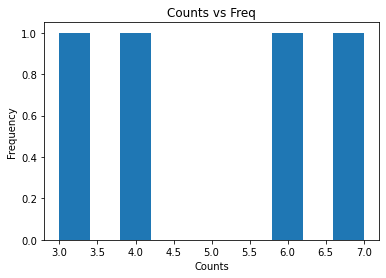

In [100]:
ax = binned_floats.plot.hist(title = "Counts vs Freq")
ax.set_xlabel("Counts")

### 3. Use pandas to create a Series from the following exam scores:

In [101]:
scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

### What is the minimum exam score? The max, mean, median?

In [104]:
scores.min(), scores.max(), scores.mean(), scores.median()

(60, 96, 78.15, 79.0)

### Plot a histogram of the scores.

Text(0.5, 0, 'Scores')

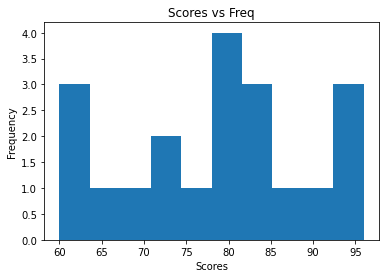

In [108]:
score_histogram = scores.plot.hist(title = "Scores vs Freq")
score_histogram.set_xlabel("Scores")

### Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.

In [110]:
def convert_to_letter_grade(score):
    if score >=90:
        return "A"
    elif score < 90 and score >= 80:
        return "B"
    elif score < 80 and score >= 70:
        return "C"
    elif score < 70 and score >= 60:
        return "D"
    else:
        return "F"
    
assert convert_to_letter_grade(scores[0]) == "D"

letter_grades = scores.apply(convert_to_letter_grade)
letter_grades

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object

### Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, and that many points should be given to every other score as well.

In [114]:
curve_correction = 100 - scores.max()
curved_scores = scores + curve_correction
curved_scores

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

### 4. Use pandas to create a Series from the following string:

In [119]:
string_series = pd.Series([char for char in 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'])

### What is the most frequently occuring letter? Least frequently occuring?

In [143]:
print(f"most frequent:  {string_series.value_counts().index[0]}")
print(f"least frequent:  {string_series.value_counts(ascending = True).index[0]}")

most frequent:  y
least frequent:  l


### How many vowels are in the list?

In [132]:
string_series.apply(count_vowels).sum()

34

### How many consonants are in the list?

In [136]:
def count_consonants(word):
    count = 0
    
    for char in word:
        if char not in "aeiou":
            count += 1
    
    return count

assert count_consonants("hamburger") == 6

string_series.apply(count_consonants).sum()

166

### Create a series that has all of the same letters, but uppercased

In [148]:
upper_cased = string_series.str.capitalize()
upper_cased.values

array(['H', 'N', 'V', 'I', 'D', 'D', 'U', 'C', 'K', 'K', 'Q', 'X', 'W',
       'Y', 'M', 'B', 'I', 'M', 'K', 'C', 'C', 'E', 'X', 'B', 'K', 'M',
       'Q', 'Y', 'G', 'K', 'X', 'O', 'Y', 'N', 'D', 'M', 'C', 'X', 'N',
       'W', 'Q', 'A', 'R', 'H', 'Y', 'F', 'F', 'S', 'J', 'P', 'S', 'R',
       'A', 'B', 'T', 'J', 'Z', 'S', 'Y', 'P', 'M', 'Z', 'A', 'D', 'F',
       'A', 'V', 'Y', 'R', 'N', 'N', 'D', 'N', 'D', 'V', 'S', 'W', 'R',
       'E', 'A', 'U', 'X', 'O', 'V', 'N', 'C', 'X', 'T', 'W', 'Z', 'P',
       'W', 'E', 'J', 'I', 'L', 'Z', 'J', 'R', 'M', 'M', 'B', 'B', 'G',
       'B', 'Y', 'X', 'V', 'J', 'T', 'E', 'W', 'Q', 'T', 'H', 'A', 'F',
       'N', 'B', 'K', 'Q', 'P', 'L', 'A', 'R', 'O', 'K', 'K', 'Y', 'Y',
       'D', 'T', 'U', 'B', 'B', 'M', 'N', 'E', 'X', 'O', 'Y', 'P', 'U',
       'L', 'Z', 'W', 'F', 'H', 'Q', 'V', 'C', 'K', 'D', 'P', 'Q', 'T',
       'P', 'O', 'P', 'P', 'Z', 'Q', 'R', 'M', 'C', 'V', 'H', 'H', 'P',
       'W', 'G', 'J', 'W', 'U', 'P', 'G', 'Z', 'H', 'I', 'O', 'F

### Create a bar plot of the frequencies of the 6 most frequently occuring letters.

<AxesSubplot:title={'center':'Six most frequent letters'}, ylabel='Occurrences'>

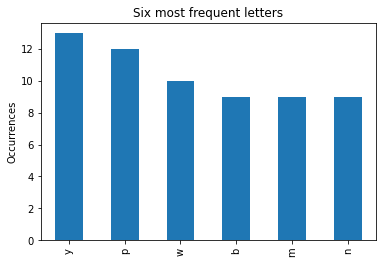

In [155]:
six_highest = string_series.value_counts().head(6)
six_highest.plot.bar(title = 'Six most frequent letters', ylabel = 'Occurrences')

### 5. Complete the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a, but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.

In [ ]:
# 17 list comprehension problems in python

fruits = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]

# Example for loop solution to add 1 to each number in the list
numbers_plus_one = []
for number in numbers:
    numbers_plus_one.append(number + 1)

# Example of using a list comprehension to create a list of the numbers plus one.
numbers_plus_one = [number + 1 for number in numbers]

# Example code that creates a list of all of the list of strings in fruits and uppercases every string
output = []
for fruit in fruits:
    output.append(fruit.upper())

In [160]:
pandas_fruits = pd.Series(fruits)
# Exercise 1 - rewrite the above example code using list comprehension syntax. Make a variable named uppercased_fruits to hold the output of the list comprehension. Output should be ['MANGO', 'KIWI', etc...]
uppercased_fruits = pandas_fruits.str.upper()
uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [161]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce output like ['Mango', 'Kiwi', 'Strawberry', etc...]
capitalized_fruits = pandas_fruits.str.capitalize()
capitalized_fruits

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

In [167]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. Hint: You'll need a way to check if something is a vowel.
fruits_with_more_than_two_vowels = pandas_fruits[pandas_fruits.apply(count_vowels) > 2]
fruits_with_more_than_two_vowels

3              guava
4          pineapple
5    mandarin orange
dtype: object

In [168]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels. The result should be ['mango', 'kiwi', 'strawberry']
fruits_with_only_two_vowels = pandas_fruits[pandas_fruits.apply(count_vowels) == 2]
fruits_with_only_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

In [169]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters
more_than_5_chars = pandas_fruits[pandas_fruits.str.len() > 5]
more_than_5_chars

2         strawberry
4          pineapple
5    mandarin orange
dtype: object

In [170]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters
exactly_5_chars = pandas_fruits[pandas_fruits.str.len() == 5]
exactly_5_chars

0    mango
3    guava
dtype: object

In [171]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters
less_than_5_chars = pandas_fruits[pandas_fruits.str.len() < 5]
less_than_5_chars

1    kiwi
dtype: object

In [ ]:
# Exercise 8 - Make a list containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]
length_of_fruits = pandas_fruits.str.len()
length_of_fruits

In [179]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a list of only the fruits that contain the letter "a"
fruits_with_letter_a = pandas_fruits[pandas_fruits.str.contains("a")]
fruits_with_letter_a

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

In [180]:
pandas_nums = pd.Series(numbers)

# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 
even_numbers = pandas_nums[pandas_nums % 2 == 0]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

In [181]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers
odd_numbers = pandas_nums[pandas_nums % 2 != 0]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

In [182]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers
positive_numbers = pandas_nums[pandas_nums > 0]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

In [183]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers
negative_numbers = pandas_nums[pandas_nums < 0]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

In [220]:
# Exercise 14 - use a list comprehension w/ a conditional in order to produce a list of numbers with 2 or more numerals
two_or_more_numerals = pandas_nums[pandas_nums.isin(range(-9,10)) == False]
two_or_more_numerals

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

In [185]:
# Exercise 15 - Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]
numbers_squared = pandas_nums ** 2
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [ ]:
# Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.
odd_negative_numbers = pandas_nums[(pandas_nums < 0) & (pandas_nums % 2 != 0)]
odd_negative_numbers

In [200]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 
numbers_plus_5 = pandas_nums + 5
numbers_plus_5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

In [223]:
# BONUS Make a variable named "primes" that is a list containing the prime numbers in the numbers list. *Hint* you may want to make or find a helper function that determines if a given number is prime or not.
def is_prime_num(num):
    if (num <= 1):
        return False

    for n in range(2, num):
        if (num % n == 0):
            return False
    
    return True

assert is_prime_num(-1) == False
assert is_prime_num(1) == False
assert is_prime_num(2)

primes = pandas_nums[pandas_nums.apply(is_prime_num)]
primes

0      2
1      3
3      5
5      7
9     11
10    13
11    17
12    19
13    23
18     5
dtype: int64